In [28]:
import os

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.optimize import minimize
from scipy.interpolate import interp1d

from astropy import constants as cnt
from astropy import units as unt

#from astropy import physical_constants, astronomical_constants

#import dask.dataframe as dd
#import dask.array as da

#from uncertainties import ufloat, unumpy

#from joblib import Parallel, delayed

#from tqdm.notebook import tqdm

#from ipywidgets import interact, FloatSlider, IntSlider

In [29]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
#plt.style.use('figs/thinfig')
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

M_sun = 1.989e33
R_sun = 6.954e10

In [30]:
# labels 
density     = r'density $\mathbf{\rho~/~[g/cm^3]}$'
frac_radius = r'fractional radius $\mathbf{r/R_\odot}$'
frac_mass   = r'fractional mass $\mathbf{m/M_\odot}$'
Teff        = r'effective temperature $\mathbf{T_{eff}/K}$'
luminosity  = r'luminosity $\mathbf{L/L_\odot}$'

In [4]:
d = '.'
file_path = os.path.join( d, 'LOGS', 'history.data')
df = pd.read_table(file_path, sep='\s+', skiprows=5)
data = df[['star_age', 'log_L', 'log_Teff', 'center_h1', 'M_BH','log_R', 'center_h1','log_LH', 'L_BH','L_E','R_B','cs_center','M_dot','log10(dm/dt)','surf_avg_omega_div_omega_crit','log10_j_B_div_j_ISCO']]

In [5]:
print(data)

         star_age     log_L  log_Teff  center_h1          M_BH     log_R  \
0    8.140904e+05 -0.129760  3.752845   0.722030  1.078120e-13 -0.047917   
1    1.790999e+06 -0.194242  3.735218   0.721983  1.078120e-13 -0.044904   
2    2.963289e+06 -0.193706  3.735021   0.721993  1.209906e-13 -0.044241   
3    4.370037e+06 -0.196131  3.734330   0.722027  1.407377e-13 -0.044073   
4    6.058135e+06 -0.199554  3.733572   0.722030  1.721750e-13 -0.044269   
..            ...       ...       ...        ...           ...       ...   
453  1.946976e+08  0.582402  3.733224   0.717910  1.197140e-01  0.347406   
454  1.947955e+08  0.424794  3.776538   0.717910  1.197767e-01  0.181974   
455  1.948151e+08  0.180426  3.813214   0.717910  1.198156e-01 -0.013561   
456  1.948151e+08  0.360778  3.858601   0.717910  1.198210e-01 -0.014160   
457  1.948151e+08  0.394685  3.867417   0.717910  1.198210e-01 -0.014838   

     center_h1    log_LH        L_BH           L_E           R_B  \
0     0.722030 -0.1

<Figure size 600x500 with 0 Axes>

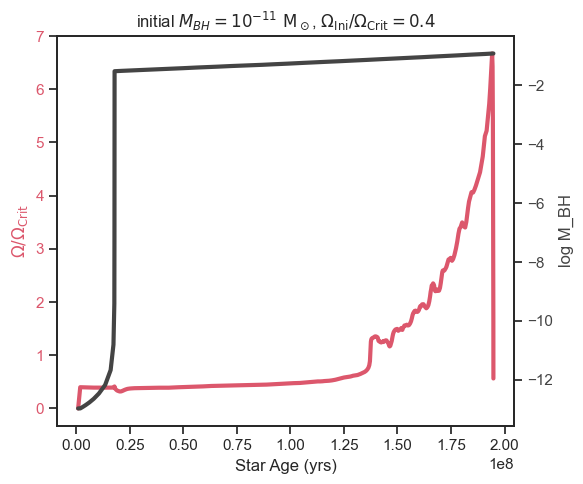

In [6]:
plt.figure(figsize=(6, 5))
fig, ax1 = plt.subplots(figsize=(6, 5))

ax1.plot(data['star_age'] , data['surf_avg_omega_div_omega_crit'] , lw=3, c="#dc576c", label='v_rot', zorder=99)
ax1.set_ylabel(r'$\Omega/\Omega_{\rm Crit}$', color="#dc576c")
ax1.tick_params(axis='y', labelcolor="#dc576c")

# Secondary y-axis for BH Mass
ax2 = ax1.twinx()  
#ax2.plot(data['star_age'] , data['cs_center']/ 1e5 , lw=3, c='#444444', label='cs_center', zorder=99)
ax2.plot(data['star_age'] , np.log10(data['M_BH']) , lw=3, c='#444444', label='MBH', zorder=99)
#ax2.plot(data['star_age'] , data['log_R'] , lw=3, c='#444444', label='logR', zorder=99)
#ax2.plot(data['star_age'] , data['log_LH'] , lw=3, c='#444444', label='logR', zorder=99)
ax2.set_ylabel(r'log M_BH', color="#444444")
#ax2.set_ylabel(r'log_R', color="#444444")
ax2.tick_params(axis='y', labelcolor="#444444")

# Common x-axis settings
ax1.set_xlabel('Star Age (yrs)')
#ax1.set_xlim([0, 13.8])
#ax1.semilogy()
#ax2.semilogy()
#ax1.set_xlim([2, 0])
#ax2.set_xlim([2, 0])
plt.title(r'initial $M_{BH} = 10^{-11}~\rm{M}_\odot$, $\Omega_{\rm Ini}/\Omega_{\rm Crit} = 0.4$')
fig.tight_layout()
        
plt.show()

<Figure size 600x500 with 0 Axes>

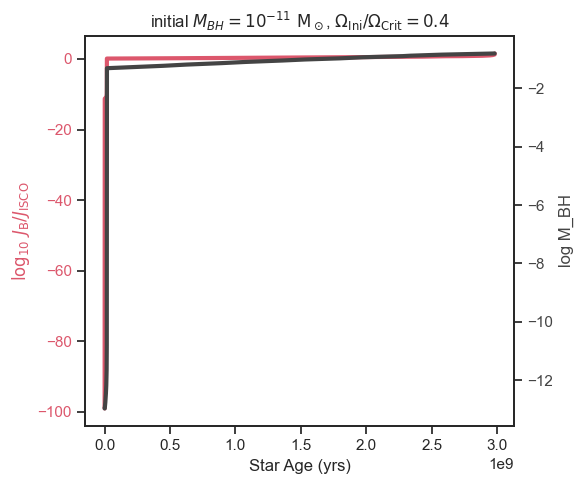

In [17]:
plt.figure(figsize=(6, 5))
fig, ax1 = plt.subplots(figsize=(6, 5))

ax1.plot(data['star_age'] , data['log10_j_B_div_j_ISCO'] , lw=3, c="#dc576c", label='log_j_B_div_j_ISCO', zorder=99)
ax1.set_ylabel(r'$\log_{10}\, J_{\rm B}/J_{\rm ISCO}$', color="#dc576c")
ax1.tick_params(axis='y', labelcolor="#dc576c")

# Secondary y-axis for BH Mass
ax2 = ax1.twinx()  
#ax2.plot(data['star_age'] , data['cs_center']/ 1e5 , lw=3, c='#444444', label='cs_center', zorder=99)
ax2.plot(data['star_age'] , np.log10(data['M_BH']) , lw=3, c='#444444', label='MBH', zorder=99)
#ax2.plot(data['star_age'] , data['log_R'] , lw=3, c='#444444', label='logR', zorder=99)
#ax2.plot(data['star_age'] , data['log_LH'] , lw=3, c='#444444', label='logR', zorder=99)
ax2.set_ylabel(r'log M_BH', color="#444444")
#ax2.set_ylabel(r'log_R', color="#444444")
ax2.tick_params(axis='y', labelcolor="#444444")

# Common x-axis settings
ax1.set_xlabel('Star Age (yrs)')
#ax1.set_xlim([0, 13.8])
#ax1.semilogy()
#ax2.semilogy()
#ax1.set_xlim([2, 0])
#ax2.set_xlim([2, 0])
plt.title(r'initial $M_{BH} = 10^{-11}~\rm{M}_\odot$, $\Omega_{\rm Ini}/\Omega_{\rm Crit} = 0.4$')
fig.tight_layout()
        
plt.show()

In [18]:
print(data['log10_j_B_div_j_ISCO'])

0     -99.000000
1     -11.245945
2     -11.243556
3     -11.195569
4     -11.133760
         ...    
526     0.948708
527     1.007691
528     1.097891
529     1.267606
530     1.551512
Name: log10_j_B_div_j_ISCO, Length: 531, dtype: float64


In [22]:
profile = 'LOGS/profile2_Disk_Formation.data'

df = pd.read_table(profile, sep='\s+', skiprows=5)
data = df[['zone','csound', 'logRho', 'mass', 'logR', 'logP', 'logT','opacity','j_rot','dynamo_log_B_r','dynamo_log_B_phi','omega']]
    



<Figure size 600x500 with 0 Axes>

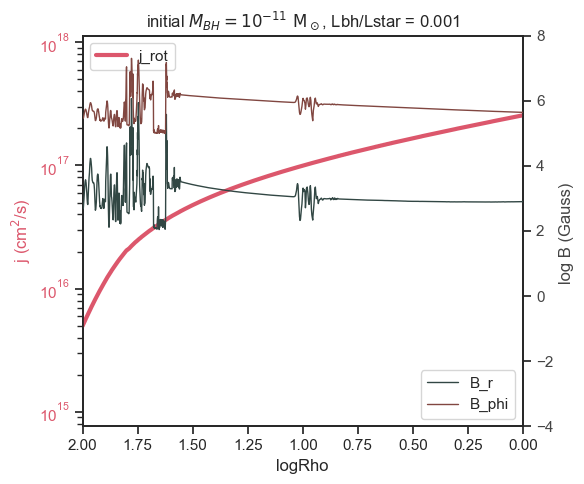

In [24]:
plt.figure(figsize=(6, 5))
fig, ax1 = plt.subplots(figsize=(6, 5))

#plt.plot(df['star_age']/1e9, 10**df['log_L'], lw=10, c='lightgray', zorder=-99, label=r'$L_\ast$')
#plt.plot(df['star_age']/1e9, 10**df['log_LH'], lw=3, c="#dc576c", label='fusion', zorder=99)#, c=cmap(norm(10**MBHf)))
ax1.plot(data['logRho'] , data['j_rot'] , lw=3, c="#dc576c", label='j_rot', zorder=99)
ax1.set_ylabel(r'j (cm$^2$/s)', color="#dc576c")
plt.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor="#dc576c")

# Secondary y-axis for BH Mass
ax2 = ax1.twinx()  
ax2.plot(data['logRho'] , data['dynamo_log_B_r'] , lw=1, c='#324744', label='B_r', zorder=99)
ax2.plot(data['logRho'] , data['dynamo_log_B_phi'] , lw=1, c='#814741', label='B_phi', zorder=99)
plt.legend(loc='lower right')
ax2.set_ylabel(r'log B (Gauss) ', color="#444444")
ax2.tick_params(axis='y', labelcolor="#444444")

# Common x-axis settings
ax1.set_xlabel('logRho')
ax1.set_xlim([2, 0])
ax2.set_xlim([2, 0])
ax2.set_ylim([-4, 8])
ax1.semilogy()
#ax2.semilogy()

plt.title(r'initial $M_{BH} = 10^{-11}~\rm{M}_\odot$, Lbh/Lstar = 0.001')
fig.tight_layout()
plt.savefig('rotation_and_bfields.pdf')
     
plt.show()

In [25]:
csound logRho 

NameError: name 'csound' is not defined

<Figure size 600x500 with 0 Axes>

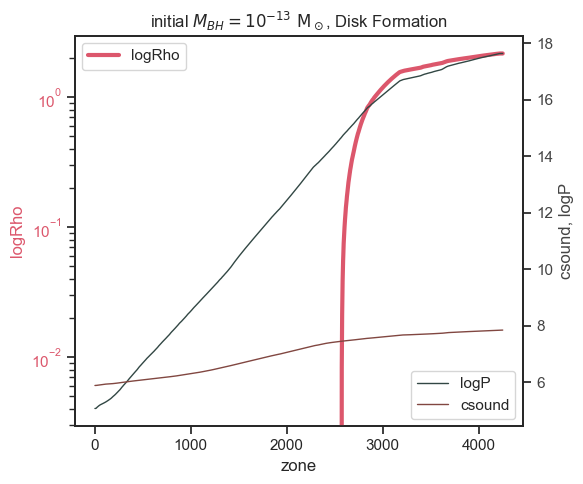

In [28]:
plt.figure(figsize=(6, 5))
fig, ax1 = plt.subplots(figsize=(6, 5))

#plt.plot(df['star_age']/1e9, 10**df['log_L'], lw=10, c='lightgray', zorder=-99, label=r'$L_\ast$')
#plt.plot(df['star_age']/1e9, 10**df['log_LH'], lw=3, c="#dc576c", label='fusion', zorder=99)#, c=cmap(norm(10**MBHf)))
ax1.plot(data['zone'] , data['logRho'] , lw=3, c="#dc576c", label='logRho', zorder=99)
ax1.set_ylabel('logRho', color="#dc576c")
plt.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor="#dc576c")

# Secondary y-axis for BH Mass
ax2 = ax1.twinx()  
ax2.plot(data['zone'] , data['logP'] , lw=1, c='#324744', label='logP', zorder=99)
ax2.plot(data['zone'] , np.log10(data['csound']) , lw=1, c='#814741', label='csound', zorder=99)
plt.legend(loc='lower right')
ax2.set_ylabel(r'csound, logP', color="#444444")
ax2.tick_params(axis='y', labelcolor="#444444")

# Common x-axis settings
ax1.set_xlabel('zone')
#ax1.set_xlim([2, 0])
#ax2.set_xlim([2, 0])
#ax2.set_ylim([-4, 8])
ax1.semilogy()
#ax2.semilogy()

plt.title(r'initial $M_{BH} = 10^{-13}~\rm{M}_\odot$, Disk Formation')
fig.tight_layout()
plt.savefig('rotation_and_bfields.pdf')
     
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_enclosed_mass(data, r_min=None, n_points=1000):
    """
    Calculate enclosed mass profile with extrapolation to small radii,
    assuming constant central density for r < r_min.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing 'logR' (log10 of radius in cm)
        and 'logRho' (log10 of density in g/cm³)
        Data should be ordered from surface to center
    r_min : float, optional
        Minimum radius for extrapolation in cm
        If None, will use an order of magnitude smaller than minimum R
    n_points : int, optional
        Number of points in the extrapolated region
        
    Returns:
    --------
    dict
        Dictionary containing arrays of:
        - radius: Array of radii including extrapolated region (cm)
        - enclosed_mass: Corresponding enclosed mass (g)
        - density: Corresponding density profile (g/cm³)
        - is_extrapolated: Boolean mask indicating extrapolated points
    """
    # Convert logarithmic quantities to linear
    Msun = 1.989e33
    Rsun = 6.955e10
    
    R = Rsun*10**data['logR'].values        # radius in Rsun
    rho = 10**data['logRho'].values    # density in g/cm³
    mass = Msun*data['mass'].values         # mass in Msun
    
    # Get central values (last points in arrays since data is surface to center)
    R_center = R[-1]
    rho_center = rho[-1]
    
    # Set up extrapolation range if needed
    if r_min is None:
        r_min = R_center / 1e13
    
    # Create extended radius array for inner region
    r_inner = np.logspace(np.log10(r_min), np.log10(R_center), n_points)
    
    # Calculate enclosed mass for inner region assuming constant central density
    # M(r) = 4/3 π r³ ρ_center for r < R_center
    m_inner = 4.0/3.0 * np.pi * r_inner**3 * rho_center

    # Combine arrays
    # Note: We reverse the original arrays since we want to go from center outward
    radius_full = np.concatenate([r_inner[:-1], R[::-1]])
    mass_full = np.concatenate([m_inner[:-1], mass[::-1]])
    density_full = np.concatenate([np.full_like(r_inner[:-1], rho_center), rho[::-1]])
    
    # Create mask for extrapolated points
    is_extrapolated = np.concatenate([np.ones_like(r_inner[:-1], dtype=bool), 
                                    np.zeros_like(R, dtype=bool)])
    
    
    # Ensure mass is monotonically increasing
    mass_full = np.maximum.accumulate(mass_full)
    
    # Create results dictionary
    results = {
        'radius': radius_full,
        'enclosed_mass': mass_full,
        'density': density_full,
        'is_extrapolated': is_extrapolated,
        # Store original data for reference
        'radius_original': R[::-1],
        'mass_original': mass[::-1],
        'density_original': rho[::-1]
    }
    
    return results

def validate_mass_profile(results):
    """
    Validate the mass profile by checking physical constraints.
    
    Parameters:
    -----------
    results : dict
        Output from calculate_enclosed_mass
        
    Returns:
    --------
    dict
        Dictionary containing validation results
    """
    validation = {
        'is_monotonic': np.all(np.diff(results['enclosed_mass']) >= 0),
        'density_continuity': np.abs(results['density'][results['is_extrapolated']][-1] - 
                                   results['density'][~results['is_extrapolated']][0]) < 1e-10,
        'mass_continuity': np.abs(results['enclosed_mass'][results['is_extrapolated']][-1] - 
                                results['enclosed_mass'][~results['is_extrapolated']][0]) < 1e-10
    }
    
    return validation

def analyze_mass_profile(results):
    """
    Analyze the enclosed mass profile.
    
    Parameters:
    -----------
    results : dict
        Output from calculate_enclosed_mass
        
    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    # Calculate mass profile properties
    analysis = {
        'total_mass': results['enclosed_mass'][-1],
        'central_density': results['density'][0],
        'surface_density': results['density'][-1],
        'central_mass': results['enclosed_mass'][0],
        'mass_ratio_extrapolated': (results['enclosed_mass'][results['is_extrapolated']][-1] / 
                                  results['enclosed_mass'][-1])
    }
    
    return analysis

def plot_stellar_structure(results, fig_size=(15, 10)):
    """
    Create comprehensive visualization of the stellar structure.
    
    Parameters:
    -----------
    results : dict
        Output from calculate_enclosed_mass
    fig_size : tuple
        Figure size in inches
        
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    fig = plt.figure(figsize=fig_size)
    gs = plt.GridSpec(2, 2, figure=fig)
    
    # 1. Enclosed Mass Profile
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.loglog(results['radius'], results['enclosed_mass'], 'b-', label='Full Profile')
    ax1.loglog(results['radius_original'], results['mass_original'], 'r.', 
               label='Original Data', markersize=4)
    
    # Highlight extrapolated region
    extrapolated_mask = results['is_extrapolated']
    ax1.loglog(results['radius'][extrapolated_mask], 
               results['enclosed_mass'][extrapolated_mask], 
               'g--', label='Extrapolated')
    
    ax1.set_xlabel('Radius (cm)')
    ax1.set_ylabel('Enclosed Mass (g)')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('Enclosed Mass Profile')
    
    # 2. Density Profile
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.loglog(results['radius'], results['density'], 'b-', label='Full Profile')
    ax2.loglog(results['radius_original'], results['density_original'], 'r.', 
               label='Original Data', markersize=4)
    
    # Highlight extrapolated region
    ax2.loglog(results['radius'][extrapolated_mask], 
               results['density'][extrapolated_mask], 
               'g--', label='Extrapolated')
    
    ax2.set_xlabel('Radius (cm)')
    ax2.set_ylabel('Density (g/cm³)')
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('Density Profile')
    
    # 3. Mass Gradient (dM/dr)
    ax3 = fig.add_subplot(gs[1, 0])
    dr = np.gradient(results['radius'])
    dm = np.gradient(results['enclosed_mass'])
    mass_gradient = dm/dr
    
    ax3.loglog(results['radius'], mass_gradient, 'b-', label='Full Profile')
    ax3.loglog(results['radius'][extrapolated_mask], 
               mass_gradient[extrapolated_mask], 
               'g--', label='Extrapolated')
    
    ax3.set_xlabel('Radius (cm)')
    ax3.set_ylabel('dM/dr')
    ax3.legend()
    ax3.grid(True)
    ax3.set_title('Mass Gradient')
    
    # 4. Mass Fraction
    ax4 = fig.add_subplot(gs[1, 1])
    mass_fraction = results['enclosed_mass'] / results['enclosed_mass'][-1]
    
    ax4.loglog(results['radius'], mass_fraction, 'b-', label='Full Profile')
    ax4.loglog(results['radius_original'], 
                 results['mass_original']/results['enclosed_mass'][-1], 
                 'r.', label='Original Data', markersize=4)
    
    ax4.set_xlabel('Radius (cm)')
    ax4.set_ylabel('Mass Fraction (M(r)/M_total)')
    ax4.legend()
    ax4.grid(True)
    ax4.set_title('Mass Fraction Profile')
    
    plt.tight_layout()
    return fig

def plot_extrapolation_detail(results):
    """
    Create detailed view of the extrapolation region.
    
    Parameters:
    -----------
    results : dict
        Output from calculate_enclosed_mass
        
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Find transition point
    transition_idx = np.where(~results['is_extrapolated'])[0][0]
    transition_r = results['radius'][transition_idx]
    
    # Plot region around transition
    window = slice(max(0, transition_idx - 1000), min(len(results['radius']), transition_idx + 1000))
    
    ax.loglog(results['radius'][window], results['enclosed_mass'][window], 'b-', label='Full Profile')
    ax.loglog(results['radius_original'], results['mass_original'], 'r.', 
              label='Original Data', markersize=4)
    
    # Highlight extrapolated region
    extrapolated_mask = results['is_extrapolated'][window]
    ax.loglog(results['radius'][window][extrapolated_mask], 
              results['enclosed_mass'][window][extrapolated_mask], 
              'g--', label='Extrapolated')
    
    # Add vertical line at transition
    ax.axvline(transition_r, color='k', linestyle=':', label='Transition Point')
    
    ax.set_xlabel('Radius (cm)')
    ax.set_ylabel('Enclosed Mass (g)')
    ax.legend()
    ax.grid(True)
    ax.set_title('Detail of Extrapolation Region')
    
    return fig

In [38]:
def calculate_freefall_timescale(enclosed_mass,radius):
    
    """
    Calculate the free fall timescale as a function of radial coordinate.
    
    Parameters:
    -----------
    enclosed_mass
    radius
        
    Returns:
    --------
    numpy.ndarray
        Free fall timescale in seconds
     """    
    # Gravitational constant in cgs units (cm³ g⁻¹ s⁻²)
    
    G = 6.67e-8
    
    # Ensure no division by zero or negative values
    valid_mass = np.maximum(enclosed_mass, 1e-100)  # Avoid division by zero
    
    # t_ff(R) = π sqrt(R³/(8GM(R)))
    tau_ff = np.pi * np.sqrt(radius**3 / (8.0 * G * valid_mass))
    
    return tau_ff

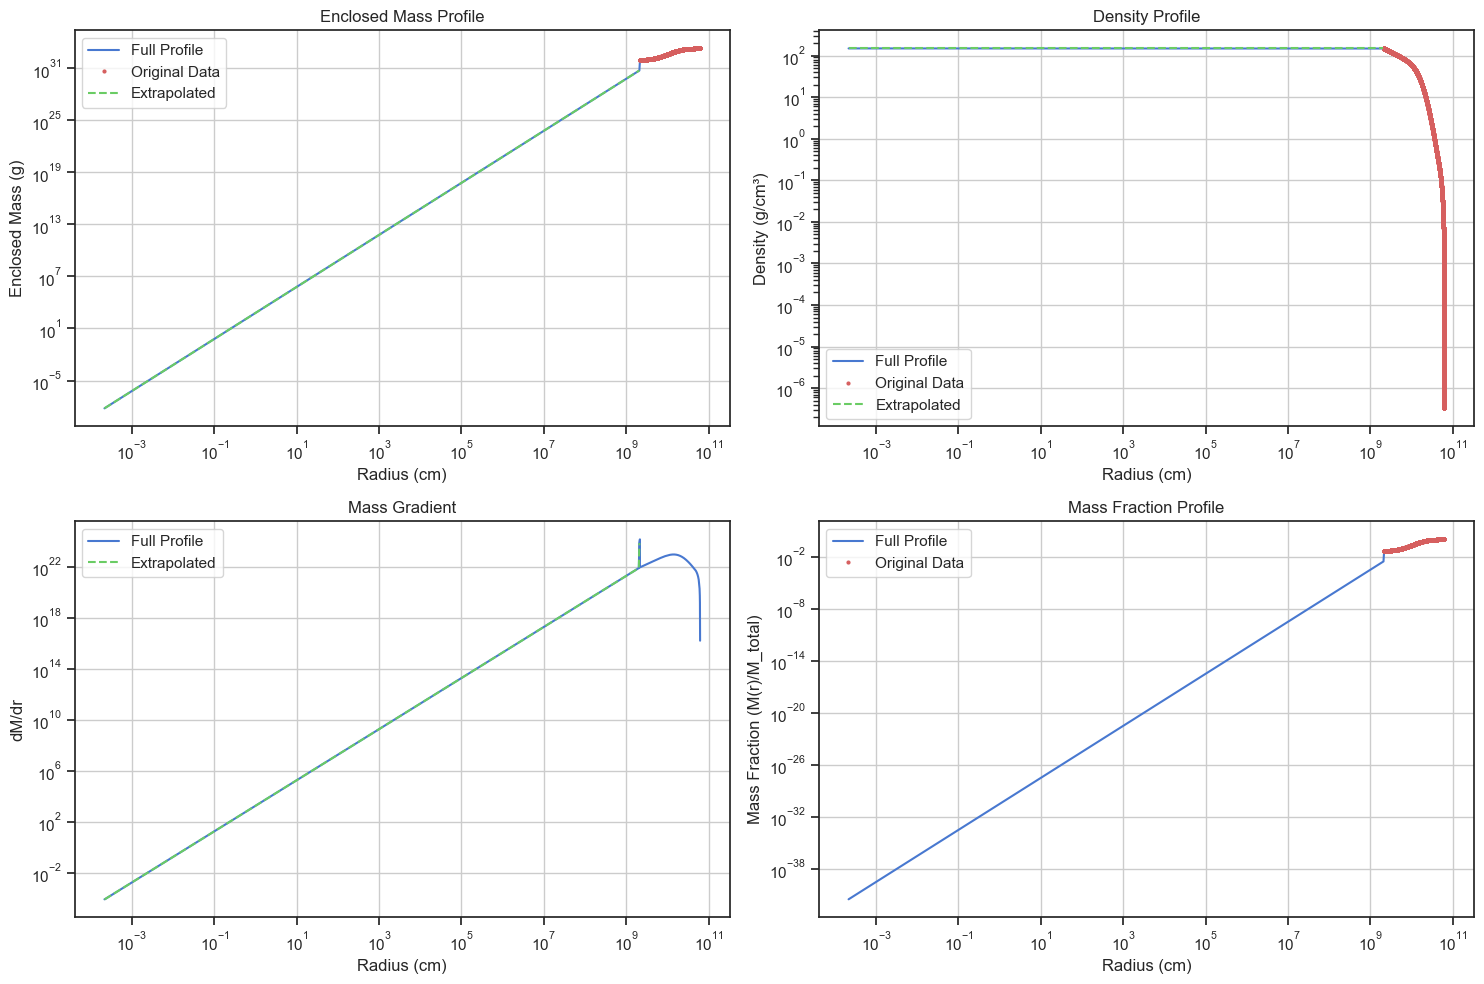

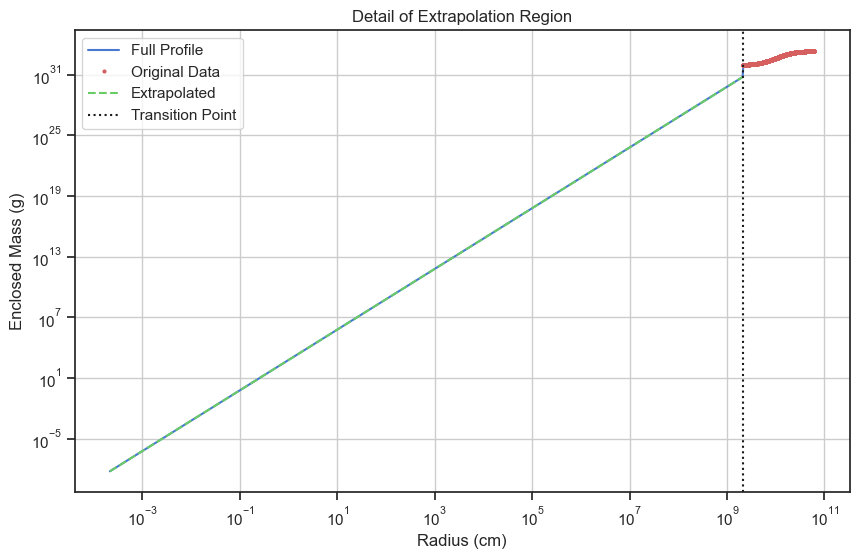

In [33]:
# Calculate enclosed mass profile
results = calculate_enclosed_mass(data)

# Create main visualization
fig_main = plot_stellar_structure(results)

# Create detailed view of extrapolation region
fig_detail = plot_extrapolation_detail(results)

# If you want to save the figures
fig_main.savefig('stellar_structure.png', dpi=300, bbox_inches='tight')
fig_detail.savefig('extrapolation_detail.png', dpi=300, bbox_inches='tight')

In [24]:
#Rs, Rlso, Rb, Rinf
Msun  = 1.989e33
Rsun  = 6.955e10
G     = 6.67e-8
c     = 2.99792458e10
mp    = 1.6749e-24 # g
sigma = 6.6524e-25 #cm^2

Mpbh = 0.049119*Msun 

In [35]:
Rs = 2.0*G*Mpbh/c**2.0
#Rb = 2.0*G*Mpbh/cs**2.0
Rb = 2.0*G*Mpbh/data['csound'].iloc[-1]**2.0
#help(data['csound'])
print(Rs)
print(Rb)

14501.025738419043
2637628995.919332


In [40]:
tff = calculate_freefall_timescale(results['enclosed_mass'],results['radius'])


In [41]:
from scipy import interpolate

# Create interpolation function
mass_to_radius = interpolate.interp1d(results['enclosed_mass'], results['radius'])
mass_to_tff = interpolate.interp1d(results['enclosed_mass'],tff)
radius_to_density = interpolate.interp1d(results['radius'],results['density'])
#radius_to_cs = interpolate.interp1d(results['radius'],data['csound'])

# Find Rinf where enclosed_mass = Mpbh
Rinf = mass_to_radius(Mpbh)
tff_inf = mass_to_tff(Mpbh)
density_rb = radius_to_density(Rb)
#csound_rb = radius_to_cs(Rb)
print(Rinf)
print(tff_inf)
print(density_rb)
#print(csound_rb)

2782194923.5490985
63.85298706949371
132.95779488353529


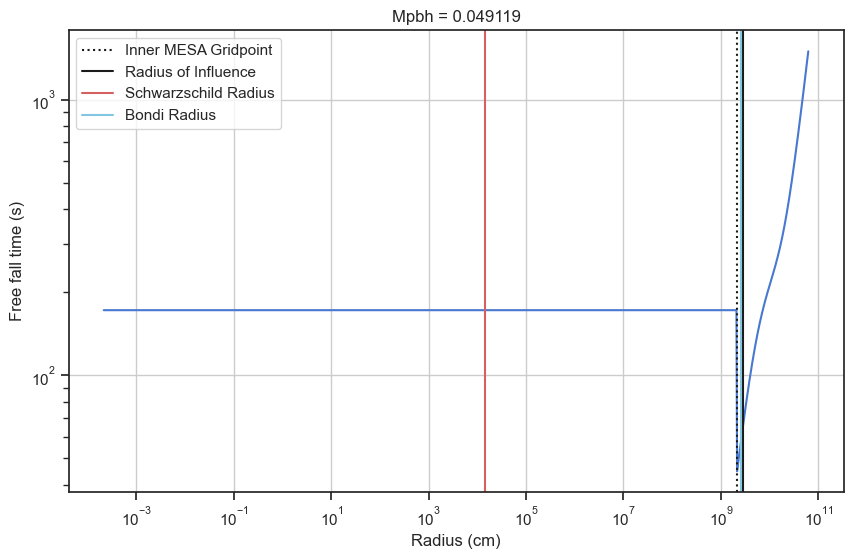

In [42]:
pbhmass = str(Mpbh/Msun)
fig, ax = plt.subplots(figsize=(10, 6))
  # Find transition point
transition_idx = np.where(~results['is_extrapolated'])[0][0]
transition_r = results['radius'][transition_idx]
ax.loglog(results['radius'], tff)
ax.axvline(transition_r, color='k', linestyle=':', label='Inner MESA Gridpoint')
ax.axvline(Rinf, color='k', linestyle='-', label='Radius of Influence')
ax.axvline(Rs, color='r', linestyle='-', label='Schwarzschild Radius')
ax.axvline(Rb, color='c', linestyle='-', label='Bondi Radius')
ax.set_xlabel('Radius (cm)')
ax.set_ylabel('Free fall time (s)')
ax.set_title(str('Mpbh = ')+pbhmass)

plt.legend()
ax.grid(True)

In [1]:
import pandas as pd


profile1 = 'LOGS/profile1.data'
profile2 = 'LOGS/profile2_Disk_Formation.data'
profile3 = 'LOGS/profile3.data'
profile4 = 'LOGS/profile4.data'

profiles = {profile1,profile2}#,profile3,profile4}

    
for p in profiles:
    
    df = pd.read_table(p, sep='\s+', skiprows=5)
    data = df[['zone','csound', 'logRho', 'mass', 'logR', 'logP', 'logT','opacity','j_rot','dynamo_log_B_r','dynamo_log_B_phi','omega']]

data


,zone,csound,logRho,mass,logR,logP,logT,opacity,j_rot,dynamo_log_B_r,dynamo_log_B_phi,omega
0,1,7.642905e+05,-6.483079,0.997603,-0.046925,5.069195,3.738958,0.400182,8.057197e+17,-99.000000,-99.000000,0.000284
1,2,7.643215e+05,-6.483001,0.997603,-0.046925,5.069306,3.738991,0.400334,8.057196e+17,-99.000000,-99.000000,0.000284
2,3,7.643593e+05,-6.482905,0.997603,-0.046925,5.069441,3.739031,0.400520,8.057195e+17,-1.502211,0.763391,0.000284
3,4,7.644027e+05,-6.482795,0.997603,-0.046925,5.069597,3.739076,0.400734,8.057194e+17,-1.468533,0.774613,0.000284
4,5,7.644518e+05,-6.482671,0.997603,-0.046925,5.069773,3.739128,0.400976,8.057190e+17,-1.547798,0.749873,0.000284
...,...,...,...,...,...,...,...,...,...,...,...,...
4183,4184,6.952624e+07,2.167260,0.032778,-1.620249,17.630707,7.325425,0.810078,6.130295e+14,6.910678,7.023796,0.000331
4184,4185,6.952624e+07,2.167260,0.032778,-1.620249,17.630707,7.325425,0.810078,6.130295e+14,6.910678,7.023796,0.000331
4185,4186,6.952624e+07,2.167260,0.032778,-1.620249,17.630707,7.325425,0.810078,6.130295e+14,6.910678,7.023796,0.000331
4186,4187,6.952624e+07,2.167260,0.032778,-1.620249,17.630707,7.325425,0.810078,6.130295e+14,8.772483,8.885601,0.000331


<Figure size 600x500 with 0 Axes>

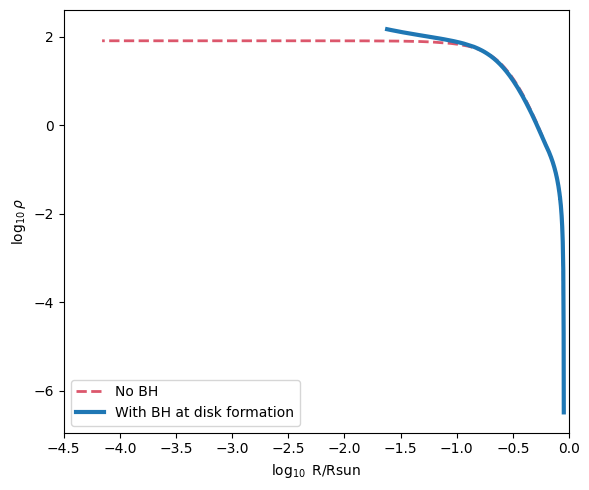

In [4]:
plt.figure(figsize=(6, 5))
fig, ax1 = plt.subplots(figsize=(6, 5))

df = pd.read_table(profile1, sep='\s+', skiprows=5)
data1 = df[['zone','csound', 'logRho', 'mass', 'logR', 'logP', 'logT','opacity','j_rot','dynamo_log_B_r','dynamo_log_B_phi','omega']]  
df = pd.read_table(profile2, sep='\s+', skiprows=5)
data2 = df[['zone','csound', 'logRho', 'mass', 'logR', 'logP', 'logT','opacity','j_rot','dynamo_log_B_r','dynamo_log_B_phi','omega']]  

ax1.plot(data1['logR'] , data1['logRho'] , lw=2, ls ='--', c="#dc576c", zorder=99,label='No BH')
ax1.plot(data2['logR'] , data2['logRho'] , lw=3, zorder=99,label='With BH at disk formation' )   
    
   
plt.legend(loc='lower left')
ax1.set_xlim([-4.5, 0])
ax1.set_ylabel(r'$\log_{\rm 10} \rho$')
ax1.set_xlabel(r'$\log_{\rm 10}$ R/Rsun')
fig.tight_layout()
    


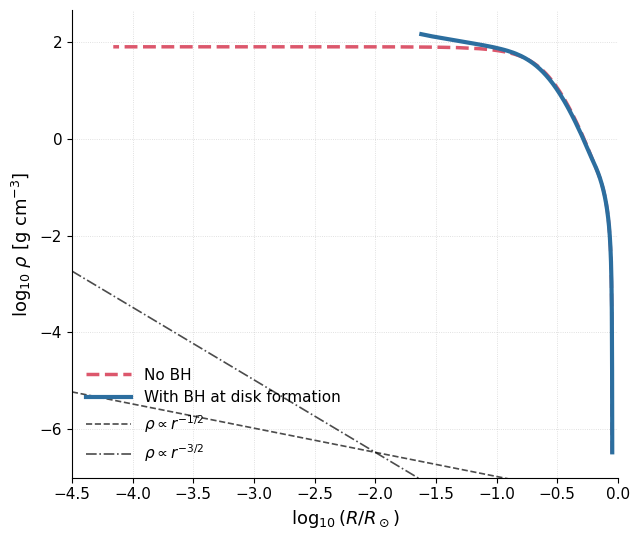

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_table(profile1, sep='\s+', skiprows=5)
data1 = df[['zone', 'csound', 'logRho', 'mass', 'logR', 'logP', 'logT',
            'opacity', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'omega']]

df = pd.read_table(profile2, sep='\s+', skiprows=5)
data2 = df[['zone', 'csound', 'logRho', 'mass', 'logR', 'logP', 'logT',
            'opacity', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'omega']]

# --- Create figure ---
fig, ax1 = plt.subplots(figsize=(6.5, 5.5))

# --- Main data lines ---
ax1.plot(data1['logR'], data1['logRho'],
         lw=2.5, ls='--', c="#dc576c", label='No BH')
ax1.plot(data2['logR'], data2['logRho'],
         lw=3, c="#2c6e9f", label='With BH at disk formation')

# --- Add scaling reference lines ---
x_ref = np.linspace(-4.5, 0, 100)
x0 = -2.0  # reference logR to anchor scaling lines
# Find approximate rho at that point from data2
y0 = np.interp(x0, data2['logR'], data2['logRho'])

ax1.plot(x_ref, y0 - 0.5 * (x_ref - x0), 'k--', lw=1.2, alpha=0.7,
         label=r'$\rho \propto r^{-1/2}$')
ax1.plot(x_ref, y0 - 1.5 * (x_ref - x0), 'k-.', lw=1.2, alpha=0.7,
         label=r'$\rho \propto r^{-3/2}$')

# --- Axis formatting ---
ax1.set_xlim([-4.5, 0])
ax1.set_ylim([min(data2['logRho'].min(), data1['logRho'].min()) - 0.5,
              max(data2['logRho'].max(), data1['logRho'].max()) + 0.5])
ax1.set_xlabel(r'$\log_{10}(R / R_\odot)$', fontsize=13)
ax1.set_ylabel(r'$\log_{10}\,\rho$ [g cm$^{-3}$]', fontsize=13)

# --- Legend and style ---
ax1.legend(frameon=False, fontsize=11, loc='lower left', handlelength=3)
ax1.grid(True, which='major', ls=':', lw=0.6, alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=11)

# --- Cosmetic polish ---
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
fig.tight_layout()
plt.show()

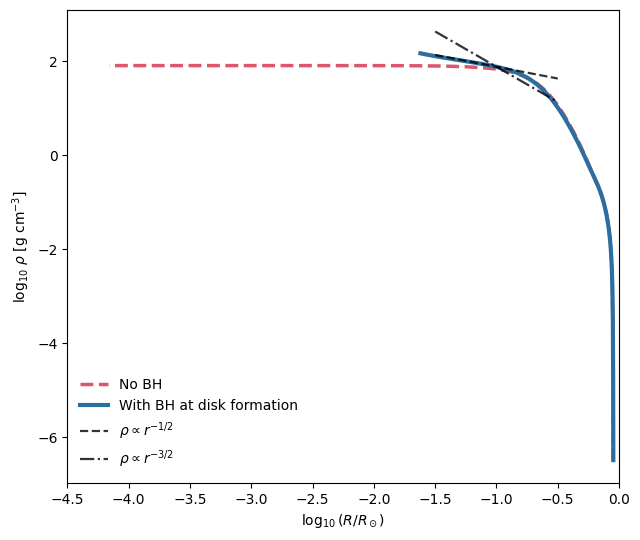

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_table(profile1, sep='\s+', skiprows=5)
data1 = df[['zone', 'csound', 'logRho', 'mass', 'logR', 'logP', 'logT',
            'opacity', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'omega']]

df = pd.read_table(profile2, sep='\s+', skiprows=5)
data2 = df[['zone', 'csound', 'logRho', 'mass', 'logR', 'logP', 'logT',
            'opacity', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'omega']]

# --- Create figure ---
fig, ax1 = plt.subplots(figsize=(6.5, 5.5))

# --- Main data lines ---
ax1.plot(data1['logR'], data1['logRho'],
         lw=2.5, ls='--', c="#dc576c", label='No BH')
ax1.plot(data2['logR'], data2['logRho'],
         lw=3, c="#2c6e9f", label='With BH at disk formation')


# Ensure monotonic x for interpolation
idx = np.argsort(data2['logR'].values)
x_data = data2['logR'].values[idx]
y_data = data2['logRho'].values[idx]

# Segment where you want the guides
x_min, x_max = -1.5, -0.5
x_ref = np.linspace(x_min, x_max, 100)

# Anchor both guide lines to the blue curve at x0
x0 = -1.0
y0 = np.interp(x0, x_data, y_data)

# Build the two scaling lines (they pass through (x0, y0))
y_r12 = y0 - 0.5 * (x_ref - x0)   # ρ ∝ r^-1/2
y_r32 = y0 - 1.5 * (x_ref - x0)   # ρ ∝ r^-3/2

# Draw only in the specified range
ax1.plot(x_ref, y_r12, 'k--', lw=1.6, alpha=0.8, label=r'$\rho \propto r^{-1/2}$')
ax1.plot(x_ref, y_r32, 'k-.', lw=1.6, alpha=0.8, label=r'$\rho \propto r^{-3/2}$')

# Keep everything else as you had it (legend, limits, labels, etc.)
ax1.set_xlim([-4.5, 0])
ax1.set_xlabel(r'$\log_{10}(R / R_\odot)$')
ax1.set_ylabel(r'$\log_{10}\,\rho$ [g cm$^{-3}$]')
ax1.legend(frameon=False, loc='lower left')
fig.tight_layout()

fig.tight_layout()
plt.show()


In [9]:
# --- after plotting your two data curves above ---

# Ensure monotonic x for interpolation
idx = np.argsort(data2['logR'].values)
x_data = data2['logR'].values[idx]
y_data = data2['logRho'].values[idx]

# Segment where you want the guides
x_min, x_max = -1.5, -0.5
x_ref = np.linspace(x_min, x_max, 100)

# Anchor both guide lines to the blue curve at x0
x0 = -1.0
y0 = np.interp(x0, x_data, y_data)

# Build the two scaling lines (they pass through (x0, y0))
y_r12 = y0 - 0.5 * (x_ref - x0)   # ρ ∝ r^-1/2
y_r32 = y0 - 1.5 * (x_ref - x0)   # ρ ∝ r^-3/2

# Draw only in the specified range
ax1.plot(x_ref, y_r12, 'k--', lw=1.6, alpha=0.8, label=r'$\rho \propto r^{-1/2}$ (anch.)')
ax1.plot(x_ref, y_r32, 'k-.', lw=1.6, alpha=0.8, label=r'$\rho \propto r^{-3/2}$ (anch.)')

# Keep everything else as you had it (legend, limits, labels, etc.)
ax1.set_xlim([-4.5, 0])
ax1.set_xlabel(r'$\log_{10}(R / R_\odot)$')
ax1.set_ylabel(r'$\log_{10}\,\rho$ [g cm$^{-3}$]')
ax1.legend(frameon=False, loc='lower left')
fig.tight_layout()


In [68]:
d = '.'
file_path = os.path.join( d, 'LOGS', 'history.data')
df = pd.read_table(file_path, sep='\s+', skiprows=5)
data = df[['star_age', 'log_L', 'log_Teff', 'center_h1', 'M_BH','log_R', 'center_h1','log_LH', 'J_BH','L_BH','L_E','R_B','cs_center','M_dot','log10(dm/dt)','surf_avg_omega_div_omega_crit','log10_j_B_div_j_ISCO']]

In [69]:
data

,star_age,log_L,log_Teff,center_h1,M_BH,log_R,center_h1,log_LH,J_BH,L_BH,L_E,R_B,cs_center,M_dot,log10(dm/dt),surf_avg_omega_div_omega_crit,log10_j_B_div_j_ISCO
0,8.140904e+05,-0.129760,3.752845,0.722030,1.078120e-13,-0.047917,0.722030,-0.131962,0.000000e+00,0.000000,1.023130e-09,1.318715e-13,5.583960e+07,4.241300e-28,0.000000,0.000000,-99.000000
1,1.790999e+06,-0.194242,3.735218,0.721983,1.078120e-13,-0.044904,0.721983,-0.193923,0.000000e+00,0.000000,1.003899e-09,1.338440e-13,5.540991e+07,4.243886e-28,0.000000,0.398831,-11.007384
2,2.963289e+06,-0.193706,3.735021,0.721993,1.209906e-13,-0.044241,0.721993,-0.165102,4.282814e+11,0.000000,9.998072e-10,1.503475e-13,5.539875e+07,4.274760e-28,5.929418,0.397368,-11.004995
3,4.370037e+06,-0.196131,3.734330,0.722027,1.407377e-13,-0.044073,0.722027,-0.141605,1.232611e+12,0.000000,1.125347e-09,1.749565e-13,5.532833e+07,5.337823e-28,6.025870,0.395388,-10.957008
4,6.058135e+06,-0.199554,3.733572,0.722030,1.721750e-13,-0.044269,0.722030,-0.159421,2.949903e+12,0.000000,1.315228e-09,2.145827e-13,5.522462e+07,7.081510e-28,6.148632,0.392938,-10.895200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1.946976e+08,0.582402,3.733224,0.717910,1.197140e-01,0.347406,0.717910,-1.392188,1.244898e+47,780.076342,7.800763e+02,1.719391e-01,4.743079e+07,2.088679e-17,16.582165,3.521546,1.465020
454,1.947955e+08,0.424794,3.776538,0.717910,1.197767e-01,0.181974,0.717910,-2.262762,1.246205e+47,659.017035,6.590170e+02,2.031287e-01,4.233579e+07,1.764539e-17,16.508925,1.642697,1.582248
455,1.948151e+08,0.180426,3.813214,0.717910,1.198156e-01,-0.013561,0.717910,-3.371444,1.247017e+47,511.480466,5.114805e+02,2.550455e-01,3.701616e+07,1.369505e-17,16.398857,0.579082,1.697159
456,1.948151e+08,0.360778,3.858601,0.717910,1.198210e-01,-0.014160,0.717910,-4.200822,1.247129e+47,353.172377,3.531724e+02,3.336335e-01,3.200464e+07,9.456302e-18,16.238015,0.653555,1.771041


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


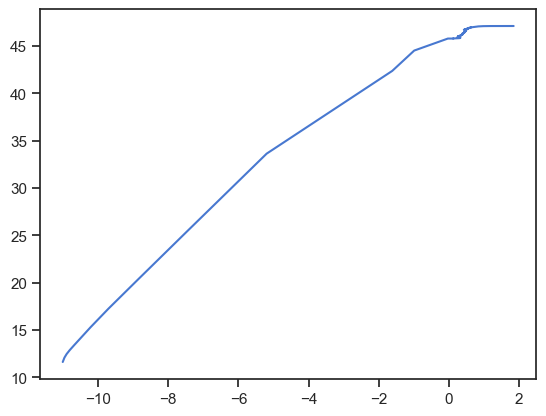

In [70]:
plt.plot(data['log10_j_B_div_j_ISCO'],np.log10(data['J_BH']))

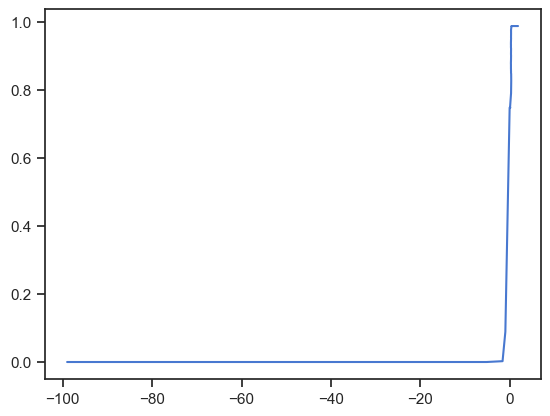

In [71]:
plt.plot(data['log10_j_B_div_j_ISCO'],c*data['J_BH']/(G*(Msun*data['M_BH'])**2.0))

In [72]:
(c*data['J_BH'])/G*(data['M_BH']*Msun)**2.0

0       0.000000e+00
1       0.000000e+00
2       1.114799e+70
3       4.341214e+70
4       1.554936e+71
           ...      
453    3.172401e+129
454    3.179057e+129
455    3.183195e+129
456    3.183767e+129
457    3.183767e+129
Length: 458, dtype: float64

In [73]:
data['J_BH']*c

0      0.000000e+00
1      0.000000e+00
2      1.283955e+22
3      3.695274e+22
4      8.843588e+22
           ...     
453    3.732109e+57
454    3.736027e+57
455    3.738462e+57
456    3.738798e+57
457    3.738798e+57
Name: J_BH, Length: 458, dtype: float64

In [74]:
G*(data['M_BH']*Msun)**2.0

0      3.067110e+33
1      3.067110e+33
2      3.862767e+33
3      5.226563e+33
4      7.822324e+33
           ...     
453    3.781685e+57
454    3.785645e+57
455    3.788105e+57
456    3.788445e+57
457    3.788445e+57
Name: M_BH, Length: 458, dtype: float64

(-10.0, 0.0)

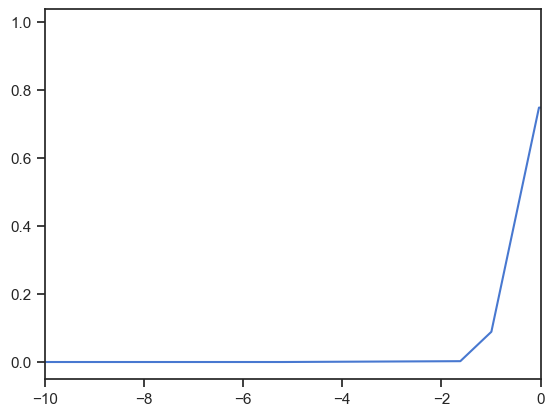

In [76]:
plt.plot(data['log10_j_B_div_j_ISCO'],c*data['J_BH']/(G*(Msun*data['M_BH'])**2.0))
plt.xlim(-10,0)
